In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
nexp = 5
ntry = 3
x = np.random.uniform(size=(nexp,ntry))
print(x)

[[0.49265679 0.45896151 0.84823452]
 [0.6401883  0.14801434 0.83767891]
 [0.94587563 0.42482651 0.1403022 ]
 [0.04041551 0.52112925 0.09591703]
 [0.12505869 0.69839595 0.78036953]]


In [3]:
eps = 0.5
s = np.array((x < eps),dtype=int)
print(s)

[[1 1 0]
 [0 1 0]
 [0 1 1]
 [1 0 1]
 [1 0 0]]


In [4]:
m = np.sum(s, axis=1)
print(m)

[2 1 2 2 1]


In [5]:
nexp = 1000
ntry = 10
eps  = 0.5
x = np.random.uniform(size=(nexp,ntry))    
s = np.array((x < eps),dtype=int)
m = np.sum(s, axis=1)        

In [6]:
print("mean expected:    ", ntry * eps)
print("mean simulated:   ", np.mean(m))
print("var expected:     ", ntry * eps * (1.0 - eps))
print("var simulated:    ", np.var(m))

mean expected:     5.0
mean simulated:    4.926
var expected:      2.5
var simulated:     2.3665240000000005


In [7]:
def throw_binomial(nexp,ntry,eps,verbose=False,compare=False):
    x = np.random.uniform(size=(nexp,ntry))    
    if verbose: print(x) 
    s = np.array((x < eps),dtype=int)
    if verbose: print(s)
    m = np.sum(s, axis=1)
    if verbose: print(m)
    if compare:                
        print("mean expected:    ", ntry * eps)
        print("mean simulated:   ", np.mean(m))
        print("var expected:     ", ntry * eps * (1.0 - eps))
        print("var simulated:    ", np.var(m))            
    return m

In [8]:
throw_binomial(nexp=5,ntry=3,eps=0.5,verbose=True)

m = throw_binomial(nexp=1000,ntry=10,eps=0.5,compare=True)
#m = throw_binomial(nexp=100000,ntry=10,eps=0.5,verbose=False)

m = throw_binomial(nexp=1000,ntry=20,eps=0.25,compare=True)








[[0.65563071 0.3686149  0.33103767]
 [0.07585325 0.55278224 0.17656391]
 [0.19266154 0.28868352 0.44468556]
 [0.21106615 0.15541957 0.13530498]
 [0.51536381 0.18650511 0.93770397]]
[[0 1 1]
 [1 0 1]
 [1 1 1]
 [1 1 1]
 [0 1 0]]
[2 2 3 3 1]
mean expected:     5.0
mean simulated:    5.009
var expected:      2.5
var simulated:     2.496919000000001
mean expected:     5.0
mean simulated:    5.085
var expected:      3.75
var simulated:     3.6517749999999998


In [25]:
nexp = 1000
ntry = 10
eps  = 0.25
m = throw_binomial(nexp=1000,ntry=10,eps=0.25)

In [26]:
counts,bines = np.histogram(m,bins=11,range=(0,11))
print("counts:     ", counts)
print("total:      ", np.sum(counts))
print("bin edges:  ", bines)

counts:      [ 51 181 286 259 157  55   8   3   0   0   0]
total:       1000
bin edges:   [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


bines[:-1]:   [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


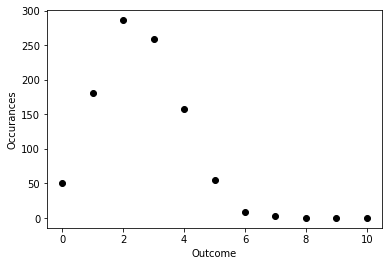

In [27]:
plt.plot(bines[:-1],counts,"ko")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
print("bines[:-1]:  ", bines[:-1])

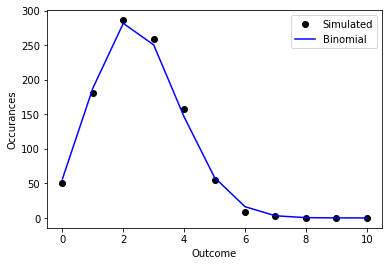

In [28]:
from scipy.stats import binom
plt.plot(bines[:-1],counts,"ko",label="Simulated")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
xpred = bines[:-1]
ypred = nexp * binom.pmf(xpred, ntry,eps) 
plt.plot(xpred, ypred,"b-",label="Binomial")
plt.legend()

In [13]:
lamb = 2.0  # new parameter of Poisson distirbution
nexp = 10000
ntry = 10000
eps  = lamb/ntry
print(eps)

0.0002


In [14]:
k = throw_binomial(nexp=nexp,ntry=ntry,eps=eps)

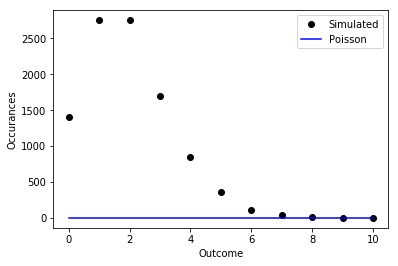

In [29]:
from scipy.stats import poisson
counts,bines = np.histogram(k,bins=11,range=(0,11))
plt.plot(bines[:-1],counts,"ko",label="Simulated")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
xpred = bines[:-1]
ypred = nexp * poisson.pmf(xpred, lamb) 
plt.plot(xpred, ypred,"b-",label="Poisson")
plt.legend()

In [34]:
lamb = 100.0  # new parameter of Poisson distirbution
nexp = 10000
ntry = 10000
eps  = lamb/ntry
print(eps)

0.01


In [35]:
x = throw_binomial(nexp=nexp,ntry=ntry,eps=eps)

[ 70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130.]


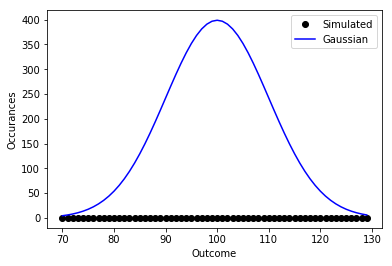

In [41]:
from scipy.stats import norm
counts,bines = np.histogram(x,bins=60,range=(70,130))
plt.plot(bines[:-1],counts,"ko",label="Simulated")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
xpred = bines[:-1]
ypred = nexp * norm.pdf(xpred, loc=lamb, scale=lamb**0.5) 
plt.plot(xpred, ypred,"b-",label="Gaussian")
plt.legend()

In [30]:
norm.pdf?

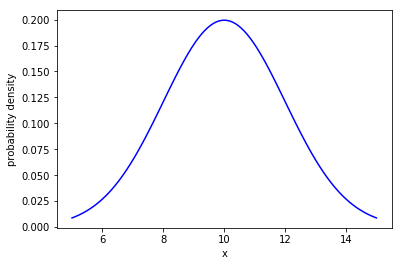

In [40]:
from scipy.stats import norm
mean  = 10.0
sigma =  2.0
x = np.linspace(5.0,15.0,100)
y = norm.pdf(x, loc=mean, scale=sigma) 
plt.xlabel("x")
plt.ylabel("probability density")
plt.plot(x,y,"b-")